In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))

print("Before reshaping, ", X.shape, y.shape)
y = y.reshape(y.shape[0], -1)
print("After reshaping, ", X.shape, y.shape)

Before reshaping,  torch.Size([100, 1]) torch.Size([100])
After reshaping,  torch.Size([100, 1]) torch.Size([100, 1])


In [ ]:
n_samples, n_features = X.shape

model = nn.Linear(in_features=n_features, out_features=1)

n_epochs=100
lr = 0.01
# Loss
criterion = nn.MSELoss()
# Optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)

for epoch in range(n_epochs):
    # Fwd pass
    y_pred = model(X)
    # Calculate loss
    loss = criterion(y_pred, y)
    # Backward pass
    loss.backward()
    # Weights update
    optimizer.step()
    # Emptying gradients
    optimizer.zero_grad()

    if epoch%10==0:
        print(f"Epoch {epoch}/{n_epochs} loss={loss.item():.5f}")


Epoch 0/100 loss=5802.54883
Epoch 10/100 loss=4294.10205
Epoch 20/100 loss=3204.50024
Epoch 30/100 loss=2416.51074
Epoch 40/100 loss=1846.01562
Epoch 50/100 loss=1432.56104
Epoch 60/100 loss=1132.63477
Epoch 70/100 loss=914.87311
Epoch 80/100 loss=756.63977
Epoch 90/100 loss=641.57684


Plotting values

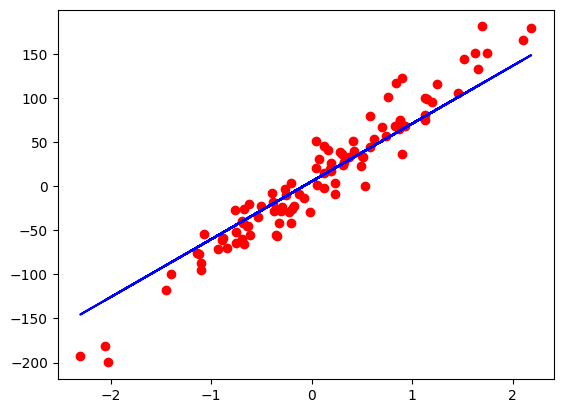

In [ ]:
# We don't want to perform operations on computation graph now
predicted = model(X).detach()

plt.plot(X, y, 'ro')
plt.plot(X, predicted, 'b')
plt.show()

# Logistic Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts

In [ ]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

print(f"Before reshaping = {X.shape}, {y.shape}")
y = y.reshape(y.shape[0], -1)
print(f"After reshaping = {X.shape}, {y.shape}")

Before reshaping = (569, 30), (569,)
After reshaping = (569, 30), (569, 1)


In [ ]:
n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=1234)

### Scaling the features with 0 mean and unit variance

Scaling will result ouput in numpy array. So perform standardisation before casting to tensor

In [ ]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
# Changing to tensors
X_train = torch.from_numpy(X_train_scaled.astype(np.float32))
X_test = torch.from_numpy(X_test_scaled.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

### Defining Model

In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self, in_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(in_features=in_features, out_features=1)

    def forward(self, x):
        y_pred = self.linear(x)
        return torch.sigmoid(y_pred)

In [ ]:
model = LogisticRegression(n_features)

n_epochs = 1000
lr = 0.01
# Binary Cross Entropy loss
criterion = nn.BCELoss()
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch%100==0:
        print(f"Epoch {epoch}/{n_epochs}, Loss = {loss.item():.5f}")


Epoch 0/1000, Loss = 0.49840
Epoch 100/1000, Loss = 0.22034
Epoch 200/1000, Loss = 0.16536
Epoch 300/1000, Loss = 0.13932
Epoch 400/1000, Loss = 0.12359
Epoch 500/1000, Loss = 0.11284
Epoch 600/1000, Loss = 0.10492
Epoch 700/1000, Loss = 0.09878
Epoch 800/1000, Loss = 0.09384
Epoch 900/1000, Loss = 0.08975


### Getting Test accuracy

In [ ]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_pred_class = y_predicted.round()
    acc = y_pred_class.eq(y_test).sum() / float(y_test.shape[0])
    print(f"Test Accuracy = {acc:.3f}")

Test Accuracy = 0.930
